In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
print(sklearn.__version__)

0.23.1


In [38]:
df100 = pd.read_excel(r"Last Data at ISB.xlsx", "Last Labeled Data")

df99 = df100.Label.replace({'S': 0, "N" : 1, "X":2})

df100["Labels"] = df99
df = df100.drop("Label",axis=1)
df

,Tweet,Labels
0,It was great season and I really enjoyed it! T...,2
1,Great work tonight with the hard working young...,0
2,"I respect hard work, leading by example, deter...",0
3,I dont know who needs to hear this but startin...,2
4,"iâ€™m so proud of josh and i, and all that weâ...",0
...,...,...
250,The Prodigy - 'Breathe' https://t.co/ycbU8Py7r...,2
251,"My daughter is 4 now, and just like her mama, ...",1
252,Prodigy - My World Empty Without You ðŸŽµ,2
253,Listening to The Prodigy on max volume doesnâ€...,2


In [39]:
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
print()

[nltk_data] Downloading package stopwords to C:\Users\Lenovo
[nltk_data]     C340\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
array = df.to_numpy()
print(array)

[['It was great season and I really enjoyed it! Thank you for the hard work and dedication thought out the entire season! Keep it up and get better every day!'
  2]
 ['Great work tonight with the hard working young ladies of the Vogues National Team 2023.  Thank you for having me ðŸ™ŒðŸ\x8f¼ @Vogues2023 https://t.co/rRTBAc0K8Q'
  0]
 ['I respect hard work, leading by example, determination,  good role model as a mom or dad, and telling the truth even when it hurts.  Freedom brings great responsibility. I admire heart and gritðŸ‡ºðŸ‡¸ðŸ’ªðŸ\x8f½'
  0]
 ['I dont know who needs to hear this but starting a Business is hard work'
  2]
 ['iâ€™m so proud of josh and i, and all that weâ€™ve accomplished lately. hard work definitely pays off, even if it takes a while â\x9d¤ï¸\x8f'
  0]
 ['Dado was a true hard worker. Not only in his career as an artist, but also as a father to his kids. I should know this because one of his sons is my stepfather and he knows how to get the job done when it come

In [41]:
X, y = df.Labels, df.Tweet
print(X, y)


0      2
1      0
2      0
3      2
4      0
      ..
250    2
251    1
252    2
253    2
254    2
Name: Labels, Length: 255, dtype: int64 0      It was great season and I really enjoyed it! T...
1      Great work tonight with the hard working young...
2      I respect hard work, leading by example, deter...
3      I dont know who needs to hear this but startin...
4      iâ€™m so proud of josh and i, and all that weâ...
                             ...                        
250    The Prodigy - 'Breathe' https://t.co/ycbU8Py7r...
251    My daughter is 4 now, and just like her mama, ...
252            Prodigy - My World Empty Without You ðŸŽµ
253    Listening to The Prodigy on max volume doesnâ€...
254    Iâ€™m just a singer, a natural born guitar ringer
Name: Tweet, Length: 255, dtype: object


In [42]:
X1 , Y1  = X.to_numpy() , y.to_numpy()

In [43]:
import nltk
nltk.download('wordnet')
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(Y1)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(Y1[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

[nltk_data] Downloading package wordnet to C:\Users\Lenovo
[nltk_data]     C340\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
Y1 = vectorizer.fit_transform(documents).toarray()
print(Y1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [194]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
Y1 = tfidfconverter.fit_transform(Y1).toarray()
print(Y1)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.04783865 0.        ]
 [0.         0.         0.         ... 0.44567251 0.0524337  0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y1, X1, test_size= 0.17)

X_test.shape

(44, 85)

In [365]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
#models = [('lgr', LogisticRegression()),('mnb', MultinomialNB()),('rfc', RandomForestClassifier()),('svm',SVC()), ('mlp', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,8), random_state=1))]
#stacking = StackingClassifier(estimators=models, n_jobs = -1, passthrough= True)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,8), random_state=1, max_iter=10000)

In [366]:
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0,
       2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2],
      dtype=int64)

In [367]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.75

<AxesSubplot:>

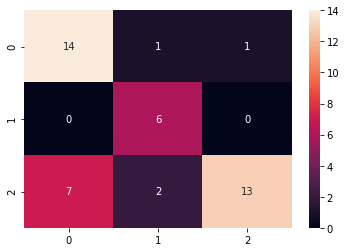

In [368]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot= True)


In [369]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [370]:
recall_score(y_test, y_pred, average= "weighted")

0.75

In [371]:
precision_score(y_test, y_pred, average="weighted")

0.7976190476190476

In [372]:
f1_score(y_test, y_pred, average="weighted")

0.7453862953862955

In [373]:
conf_mat

array([[14,  1,  1],
       [ 0,  6,  0],
       [ 7,  2, 13]], dtype=int64)

In [374]:
%store -r Y2NVS

In [375]:
Y2NVS.shape

(3130, 85)

In [377]:
y_pred2 = MLP.predict(Y2NVS)
y_pred2

array([0, 0, 2, ..., 0, 0, 0], dtype=int64)

In [378]:
df22 = pd.DataFrame(y_pred2)
df22.columns = ["Labels"]

In [379]:
%store -r dfNVSTweet

In [381]:
dfNVSTweet["Labels"] = df22["Labels"]
dfNVSTweet

,Tweet,Labels
0,Winners take home the prize! Employees meeting...,0
1,All you hard work paid off. Canâ€™t tell you h...,0
2,Just done a massive pass the parcel loved thes...,2
3,Thank you @SportsANR for the great coverage an...,0
4,Hard work pays off!! Keep grinding kid!! @Seth...,1
...,...,...
3125,Wow! A great award acknowledging the hard work...,2
3126,I canâ€™t wait for @OryendFisher to get in fro...,2
3127,"Congratulations, Yvonne and Carly â€” you set ...",0
3128,"This is amazing. Passion, hard work, elbow gre...",0


In [382]:
filename = "Labeled Data at ISB.xlsx"

dfNVSTweet.to_excel(filename)